Розробити типи для облiку продаж товарiв у супермаркетi. Асортиментподано перелiком товарiв, якi характеризуються iдентифiкацiйним номе-ром, назвою, категорiєю та належнiстю до акцiйної групи (так/нi). Цiнитоварiв визначаються тарифiкацiйним перелiком, де кожному iдентифiка-цiйному номеру поставлено у вiдповiднiсть цiну за одиницю товару. Прирозрахунках реальна цiна акцiйного товару становить половину тарифної.Данi продаж характеризуються iдентифiкацiйним номером проданого това-ру та кiлькiстю одиниць. Асортимент та тарифи подано окремими файлами.Продажi також подано кiлькома (> одного) окремими файлами. Викори-стовуючи pandas:

0. Побудувати датафрейм з iнформацiєю про усi проданi товари.
1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю-чого списку, для кожної назви виручену суму у форматi < назва товару -сума >.
2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >.
2а. Побудувати дiаграму виручених сум по категорiях.
3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.
4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.
5. Отримати загальну суму ПРОДАНИХ товарiв.
6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [3]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
from matplotlib import pyplot as plt

### with Pandas

In [4]:
assortment = pd.read_csv("assortment.csv")
assortment

Number   Title   Category Promotional
0   12345  title1  category1         yes
1   34567  title2  category1         yes
2   56789  title3  category2          no
3   78912  title4  category3         yes
4   91234  title5  category3          no
5   23456  title6  category2         yes

In [5]:
tarifs = pd.read_csv("tarifs.csv")
tarifs

Number  Price
0   12345    100
1   34567    150
2   56789     75
3   78912    200
4   91234    125
5   23456    300

In [6]:
sales1 = pd.read_csv("sales1.csv")
sales1

Number  Amount
0   12345       5
1   34567       4
2   56789       2
3   12345       3
4   78912       1
5   12345       1
6   91234       3
7   34567       2

In [7]:
sales2 = pd.read_csv("sales2.csv")
sales2

Number  Amount
0   91234       3
1   91234       2
2   78912       1
3   12345       1
4   78912       5
5   34567       5
6   56789       7

In [8]:
sales = [sales1, sales2]
sales = pd.concat(sales)
sales = sales.reset_index()
del sales["index"]
sales

Number  Amount
0    12345       5
1    34567       4
2    56789       2
3    12345       3
4    78912       1
5    12345       1
6    91234       3
7    34567       2
8    91234       3
9    91234       2
10   78912       1
11   12345       1
12   78912       5
13   34567       5
14   56789       7

### 0.
Побудувати датафрейм з iнформацiєю про усi проданi товари.

In [9]:
df = pd.merge(sales, assortment)
df = df.merge(tarifs)
df

Number  Amount   Title   Category Promotional  Price
0    12345       5  title1  category1         yes    100
1    12345       3  title1  category1         yes    100
2    12345       1  title1  category1         yes    100
3    12345       1  title1  category1         yes    100
4    34567       4  title2  category1         yes    150
5    34567       2  title2  category1         yes    150
6    34567       5  title2  category1         yes    150
7    56789       2  title3  category2          no     75
8    56789       7  title3  category2          no     75
9    78912       1  title4  category3         yes    200
10   78912       1  title4  category3         yes    200
11   78912       5  title4  category3         yes    200
12   91234       3  title5  category3          no    125
13   91234       3  title5  category3          no    125
14   91234       2  title5  category3          no    125

### 1.
Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю-чого списку, для кожної назви виручену суму у форматi < назва товару -сума >.

In [10]:
categories = set(df["Category"])

def choose1(Category):
    df1 = df.copy()
    df1 = df1[df1.Category == Category]
    df1.loc[(df1.Promotional == "yes"), "Price"] = df1["Price"] / 2
    del df1["Promotional"]
    del df1["Category"]
    del df1["Number"]
    df1["Price"] = df1["Price"] * df1["Amount"]
    del df1["Amount"]
    df1 = df1.groupby(["Title"]).sum()
    display(df1)

interact(choose1, Category=categories);

Price
Title        
title1  500.0
title2  825.0

### 2.
Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >. 2а. Побудувати дiаграму виручених сум по категорiях.

Price
Category         
category1  1325.0
category2   675.0
category3  1700.0

<AxesSubplot:ylabel='Category'>

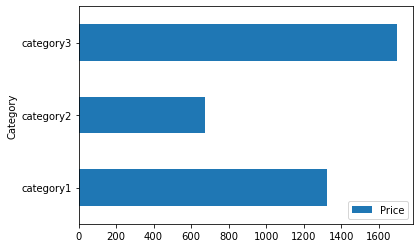

In [11]:
df2 = df.copy()
del df2["Number"]
del df2["Title"]
df2.loc[(df2.Promotional == "yes"), "Price"] = df2["Price"] / 2
del df2["Promotional"]
df2["Price"] = df2["Price"] * df2["Amount"]
del df2["Amount"]
df2 = df2.groupby(["Category"]).sum()
display(df2)
df2.plot.barh()

### 3.
Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [12]:
df3 = df.copy()
df3.loc[df3.Promotional == "yes", "Price"] = df3["Price"] / 2
del df3["Promotional"]
del df3["Number"]
df3["Price"] = df3["Price"] * df3["Amount"]
del df3["Amount"]
df3 = df3.groupby(["Category", "Title"]).sum()
df3 = df3.reset_index()
df3 = df3.groupby(["Category"]).max()
df3

Title   Price
Category                 
category1  title2   825.0
category2  title3   675.0
category3  title5  1000.0

### 4
У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [13]:
categories = set(df["Category"])

def choose4(Category):
    df4 = df.copy()
    df4 = df4[df4.Category == Category]
    df4 = df4[df4.Promotional == "yes"]
    df4["Price"] = df4["Price"] / 2
    df4["Final price"] = df4["Price"] * df4["Amount"]
    del df4["Price"]
    df4 = df4.groupby(["Category", "Title"]).agg({"Final price":"sum", "Amount":"sum"})
    display(df4)

interact(choose4, Category=categories);

Final price  Amount
Category  Title                      
category1 title1        500.0      10
          title2        825.0      11

### 5.
Отримати загальну суму ПРОДАНИХ товарiв.

In [14]:
df5 = df.copy()
df5.loc[df5.Promotional == "yes", "Price"] = df5["Price"] / 2
del df5["Promotional"]
df5["Price"] = df5["Price"] * df5["Amount"]
del df5["Amount"]
display(df5)
print(df5["Price"].sum())

Number   Title   Category  Price
0    12345  title1  category1  250.0
1    12345  title1  category1  150.0
2    12345  title1  category1   50.0
3    12345  title1  category1   50.0
4    34567  title2  category1  300.0
5    34567  title2  category1  150.0
6    34567  title2  category1  375.0
7    56789  title3  category2  150.0
8    56789  title3  category2  525.0
9    78912  title4  category3  100.0
10   78912  title4  category3  100.0
11   78912  title4  category3  500.0
12   91234  title5  category3  375.0
13   91234  title5  category3  375.0
14   91234  title5  category3  250.0

3700.0


### 6.
Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

### without Pandas

In [15]:
class Assortment:
    
    def __init__(self, number, title, category, promotional):
        self.number = number
        self.title = title
        self.category = category
        self.promotional = promotional
        
    @property
    def number(self):
        return self._number
    @number.setter
    def number(self, value):
        self._number = value
        
    @property
    def category(self):
        return self._category
    @category.setter
    def category(self, value):
        self._category = value
        
    @property
    def title(self):
        return self._title
    @title.setter
    def title(self, value):
        self._title = value
        
    @property
    def promotional(self):
        return self._promotional
    @promotional.setter
    def promotional(self, value):
        self._promotional = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nTitle: {self.title}\
                 \nCategory: {self.category}\
                 \nPromotional: {self.promotional}"
    
class Tarif:
        
    def __init__(self, number, price):
        self.number = number
        self.price = price
        
    @property
    def number(self):
        return self._number
    @number.setter
    def number(self, value):
        self._number = value
        
    @property
    def price(self):
        return self._price
    @price.setter
    def price(self, value):
        self._price = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nPrice: {self.price}"
    
class Sale:
        
    def __init__(self, number, amount):
        self.number = number
        self.amount = amount
        
    @property
    def number(self):
        return self._number
    @number.setter
    def number(self, value):
        self._number = value
        
    @property
    def amount(self):
        return self._amount
    @amount.setter
    def amount(self, value):
        self._amount = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nAmount: {self.amount}"

In [16]:
assortments = []
with open("assortment.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        assortments.append(Assortment(row[0], row[1], row[2], row[3]))
        
tarifs = []
with open("tarifs.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        tarifs.append(Tarif(row[0], float(row[1])))
        
sales = []
with open("sales1.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        sales.append(Sale(row[0], int(row[1])))
sales2 = []
with open("sales2.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        sales2.append(Sale(row[0], int(row[1])))
for i in sales2:
    sales.append(i)

In [17]:
for i in assortments:
    print(i)


Number: 12345                 
Title: title1                 
Category: category1                 
Promotional: yes

Number: 34567                 
Title: title2                 
Category: category1                 
Promotional: yes

Number: 56789                 
Title: title3                 
Category: category2                 
Promotional: no

Number: 78912                 
Title: title4                 
Category: category3                 
Promotional: yes

Number: 91234                 
Title: title5                 
Category: category3                 
Promotional: no

Number: 23456                 
Title: title6                 
Category: category2                 
Promotional: yes


In [18]:
for i in tarifs:
    print(i)


Number: 12345                 
Price: 100.0

Number: 34567                 
Price: 150.0

Number: 56789                 
Price: 75.0

Number: 78912                 
Price: 200.0

Number: 91234                 
Price: 125.0

Number: 23456                 
Price: 300.0


In [19]:
for i in sales:
    print(i)


Number: 12345                 
Amount: 5

Number: 34567                 
Amount: 4

Number: 56789                 
Amount: 2

Number: 12345                 
Amount: 3

Number: 78912                 
Amount: 1

Number: 12345                 
Amount: 1

Number: 91234                 
Amount: 3

Number: 34567                 
Amount: 2

Number: 91234                 
Amount: 3

Number: 91234                 
Amount: 2

Number: 78912                 
Amount: 1

Number: 12345                 
Amount: 1

Number: 78912                 
Amount: 5

Number: 34567                 
Amount: 5

Number: 56789                 
Amount: 7


### 1.
Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю-чого списку, для кожної назви виручену суму у форматi < назва товару -сума >.

In [21]:
categories = set()
for i in assortments:
    categories.add(i.category)

def choose1(Category):
    numbers = []
    for i in assortments:
        if i.category == Category:
            numbers.append(i)
    print(f"{Category}:")
    for n in numbers:
        price_sum = 0
        for t in tarifs:
            if n.number == t.number:
                for s in sales:
                    if n.number == s.number:
                        if n.promotional == "yes":
                            price_sum += t.price * s.amount / 2
                        else:
                            price_sum += t.price * s.amount
        print(f"{n.title} - {price_sum}")

interact(choose1, Category=categories);

category1:
title1 - 500.0
title2 - 825.0


### 2.
Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >. 2а. Побудувати дiаграму виручених сум по категорiях.

In [22]:
categories = set()
for i in assortments:
    categories.add(i.category)
    
for c in categories:
    price_sum = 0
    for a in assortments:
        if c == a.category:
            for t in tarifs:
                if t.number == a.number:
                    for s in sales:
                        if s.number == a.number:
                            if a.promotional == "yes":
                                price_sum += t.price * s.amount / 2
                            else:
                                price_sum += t.price * s.amount
    print(f"{c} - {price_sum}")

category1 - 1325.0
category2 - 675.0
category3 - 1700.0


### 3.
Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [23]:
categories = set()
for i in assortments:
    categories.add(i.category)
    
for c in categories:
    ls = []
    numbers = []
    for i in assortments:
        if i.category == c:
            numbers.append(i)
    for n in numbers:
        price_sum = 0
        for t in tarifs:
            if t.number == n.number:
                for s in sales:
                    if s.number == n.number:
                        if n.promotional == "yes":
                            price_sum += t.price * s.amount / 2
                        else:
                            price_sum += t.price * s.amount
        ls.append([n.title, price_sum])
    ls_ = max(ls, key=lambda item: item[1])
    print(f"{c}: {ls_[0]} - {ls_[1]}")

category1: title2 - 825.0
category2: title3 - 675.0
category3: title5 - 1000.0


### 4.
У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [24]:
categories = set()
for i in assortments:
    categories.add(i.category)
    
def choose4(Category):
    numbers = []
    for i in assortments:
        if i.category == Category and i.promotional == "yes":
            numbers.append(i)
    for n in numbers:
        amount = 0
        price_sum = 0
        for t in tarifs:
            if t.number == n.number:
                for s in sales:
                    if s.number == n.number:
                        price_sum += t.price * s.amount / 2
                        amount += s.amount
        print(f"{n.title}:\nPrice sum - {price_sum}\nAmount - {amount}")
interact(choose4, Category=categories);

title1:
Price sum - 500.0
Amount - 10
title2:
Price sum - 825.0
Amount - 11


### 5.
Отримати загальну суму ПРОДАНИХ товарiв.

In [25]:
total_sum = 0
for a in assortments:
    for t in tarifs:
        if a.number == t.number:
            for s in sales:
                if s.number == a.number:
                    if a.promotional == "yes":
                        total_sum += t.price * s.amount / 2
                    else:
                        total_sum += t.price * s.amount
print(f"Total sum: {total_sum}")

Total sum: 3700.0
